<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2023-08-30 20:20:31--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2023-08-30 20:20:31--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2023-08-30 20:20:31 (11.4 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2023-08-30 20:20:31--
Total wall clock time: 0.5s
Downloaded: 1 files, 418K in 0.04s (11.4 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('weight_height.csv')
des = df.describe()
des.loc['NaN'] = df.isna().sum()
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
NaN,0.000000,0.000000


In [5]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(subset=["Gender"], inplace=True)
df_clean.dropna(subset=["Height"], inplace=True)
df_clean.dropna(subset=["Weight"], inplace=True)

In [6]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
df2 = df_clean.copy()
df2.columns = ['Genero','Altura', 'Peso']
df2['Genero'] = df2.apply(lambda x: 'Masculino' if x.Genero == 'Male' else 'Femenino', axis=1)
df2['Altura'] = df2.apply(lambda x: (x.Altura)*0.0254 , axis=1)
df2['Peso'] = df2.apply(lambda x: (x.Peso)/2.2046 , axis=1)
df2.head()
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

,Genero,Altura,Peso
0,Masculino,1.875714,109.722200
1,Masculino,1.747060,73.623547
2,Masculino,1.882397,96.498619
3,Masculino,1.821967,99.810610
4,Masculino,1.774998,93.599656


In [8]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('La cantidad de filas para analizar son: ',df.shape[0])

La cantidad de filas para analizar son:  10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

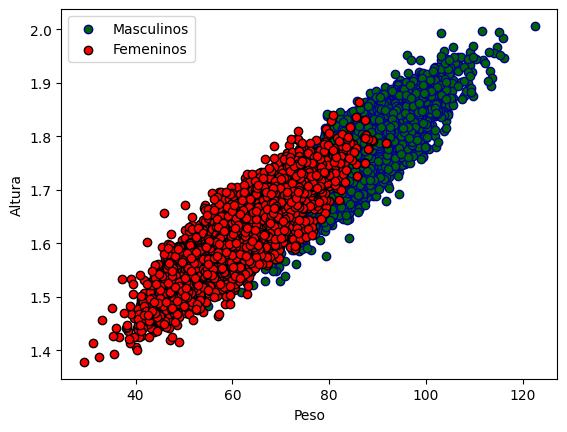

In [9]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
df_masculino = df2[df2['Genero'] == 'Masculino']
df_femenino = df2[df2['Genero'] == 'Femenino']
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(df_masculino.Peso, df_masculino.Altura, color='darkGreen', edgecolors='darkBlue', label="Masculinos")
ax1.scatter(df_femenino.Peso, df_femenino.Altura, color='red', edgecolors='black', label="Femeninos")
ax1.set_xlabel('Peso')
ax1.set_ylabel('Altura')
ax1.legend()
plt.show()


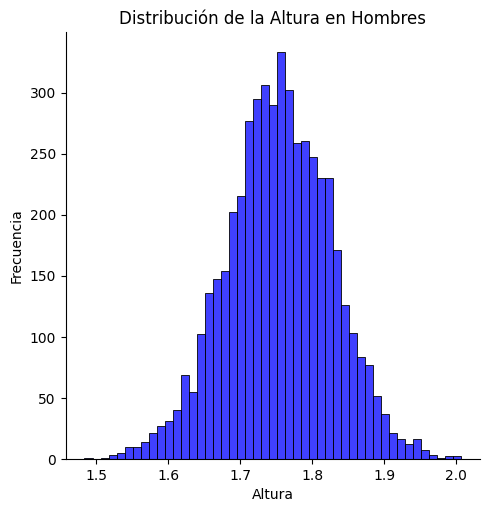

El valor medio es:  1.7532691860179221


In [10]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.displot(df_masculino['Altura'], color='blue')
plt.title('Distribución de la Altura en Hombres')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()
print('El valor medio es: ',df_masculino['Altura'].mean())

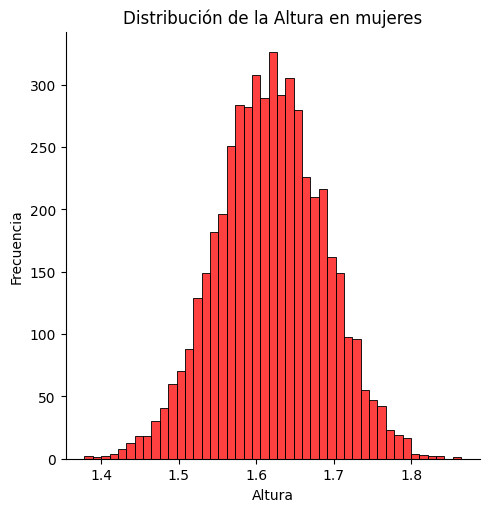

El valor medio es:  1.6182028495269967


In [11]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.displot(df_femenino['Altura'], color='red')
plt.title('Distribución de la Altura en mujeres')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()
print('El valor medio es: ',df_femenino['Altura'].mean())


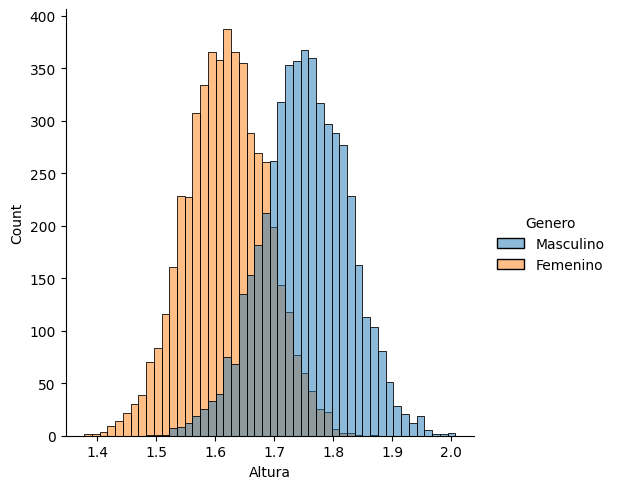

In [12]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="Genero"
sns.displot(data=df2, x="Altura", hue="Genero")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [14]:
X = df_masculino[['Peso']].values
y = df_masculino['Altura'].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [17]:
from sklearn.metrics import r2_score

value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [19]:
peso = np.array([[83]])
y_hat_prueba = lr.predict(peso)
y_hat_prueba

array([1.74046083])